# Tarefa 3 - Regressão Logística

Disciplina de Introdução ao Aprendizado de Máquina - 2024.1

Professor: João Carlos Pereira da Silva

Aluno: Manoel Marcelo da Silva (121088349)

## Analisando o dataset

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [59]:
# Carregando Iris dataset

iris = pd.read_csv('iris.csv')
iris.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
iris.dtypes

sepalLengthInCM    float64
sepalWidthInCM     float64
petalLengthInCM    float64
petalWidthInCM     float64
target              object
dtype: object

In [61]:
iris.count()

sepalLengthInCM    150
sepalWidthInCM     150
petalLengthInCM    150
petalWidthInCM     150
target             150
dtype: int64

In [62]:
# Verificando o numero de amostras de cada classe
iris['target'].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [63]:
# transformando a coluna target em ordinais
iris['target'] = pd.Categorical(iris['target'])
iris['target'] = iris['target'].cat.codes

iris.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
def normalize_dataset(dataset):
    return (dataset - dataset.min()) / (dataset.max() - dataset.min())

def standardize_dataset(dataset):
    return (dataset - dataset.mean()) / dataset.std()

In [65]:
iris_normalized = iris.copy()
iris_normalized = normalize_dataset(iris_normalized[['sepalLengthInCM' , 'sepalWidthInCM' , 'petalLengthInCM' , 'petalWidthInCM']])
iris_normalized['target'] = iris['target']
iris_normalized.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [66]:
iris_standardized = iris.copy()
iris_standardized = standardize_dataset(iris_standardized[['sepalLengthInCM' , 'sepalWidthInCM' , 'petalLengthInCM' , 'petalWidthInCM']])
iris_standardized['target'] = iris['target']
iris_standardized.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.018437,1.259242,-1.336794,-1.308593,0


## Implementação da Regressão Logística com Gradiente Descendente

In [91]:
def LogisticRegression(X, y, alpha, n_iterations):
    '''
    Função que implementa a regressão logística com gradiente descendente
    X: matriz de features
    y: vetor de labels
    alpha: taxa de aprendizado
    n_iterations: número de iterações
    '''
    # adding a column of ones to the matrix of features
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    for i in range(n_iterations):
        z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-z))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - alpha * gradient
    return theta

In [116]:
def predict(X, theta):
    '''
    Função que implementa a predição de um modelo de regressão logística
    X: matriz de features
    theta: vetor de parâmetros
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def predict_class(X, theta):
    '''
    Função que implementa a predição de um modelo de regressão logística
    X: matriz de features
    theta: vetor de parâmetros
    '''
    return np.round(predict(X, theta))

## K-Fold usando a Regressão Logística com Gradiente Descendente no dataset iris

### Database Normalizado

Accuracy: 0.7333333333333333


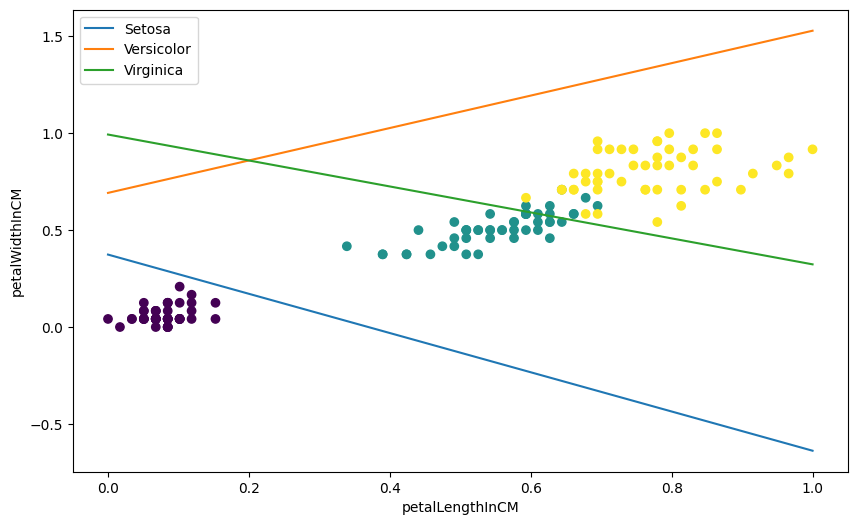

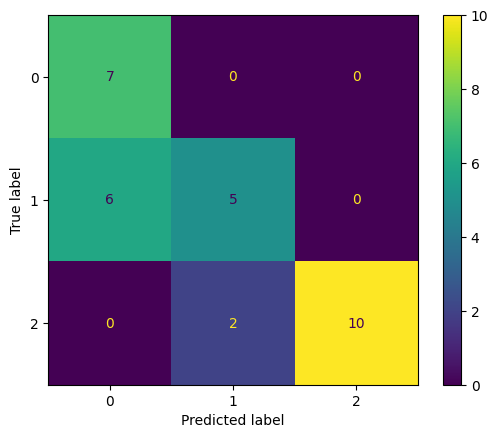

Accuracy: 0.6


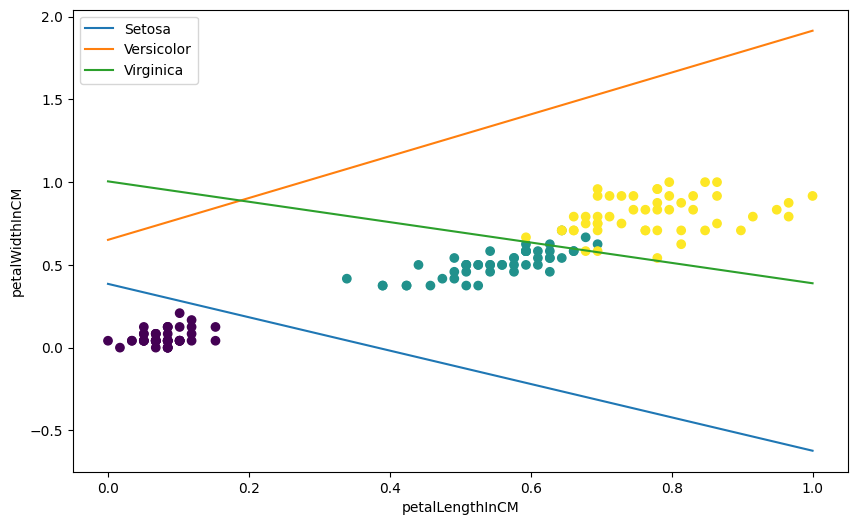

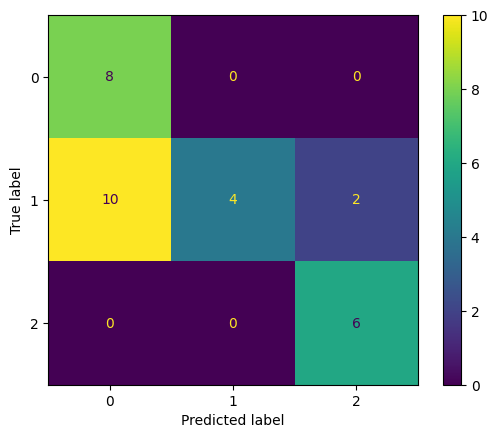

Accuracy: 0.8


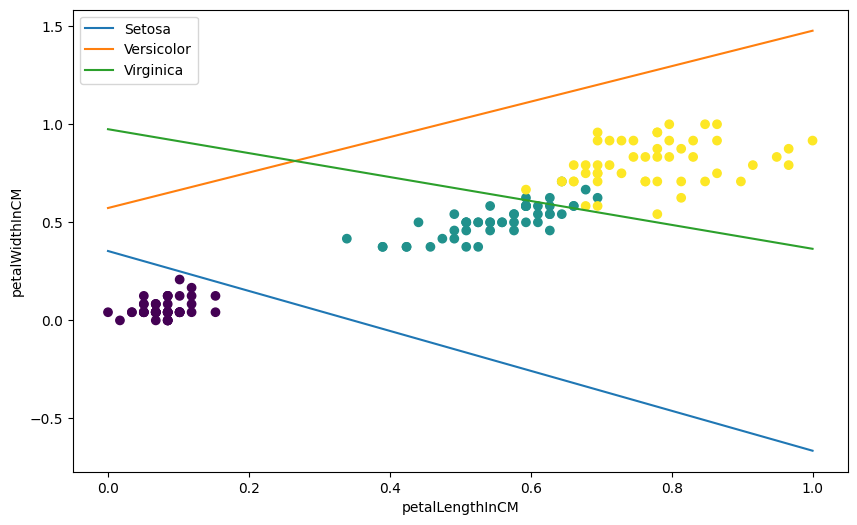

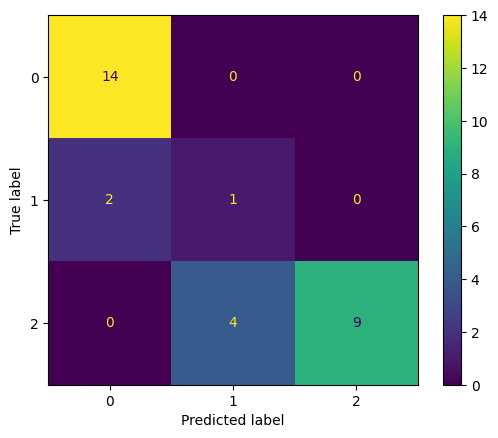

Accuracy: 0.6333333333333333


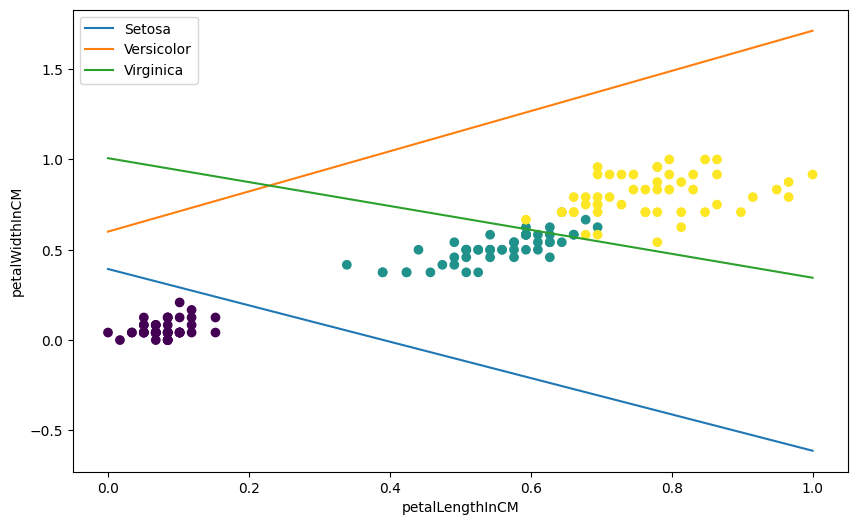

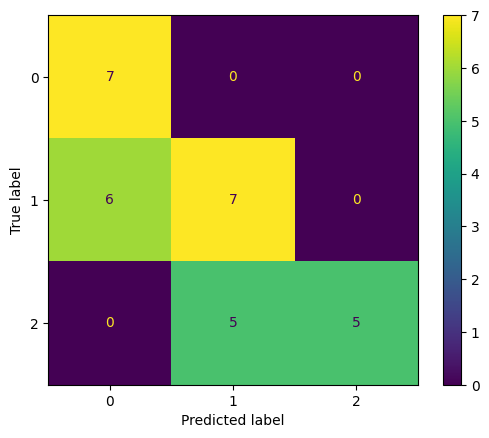

Accuracy: 0.7666666666666667


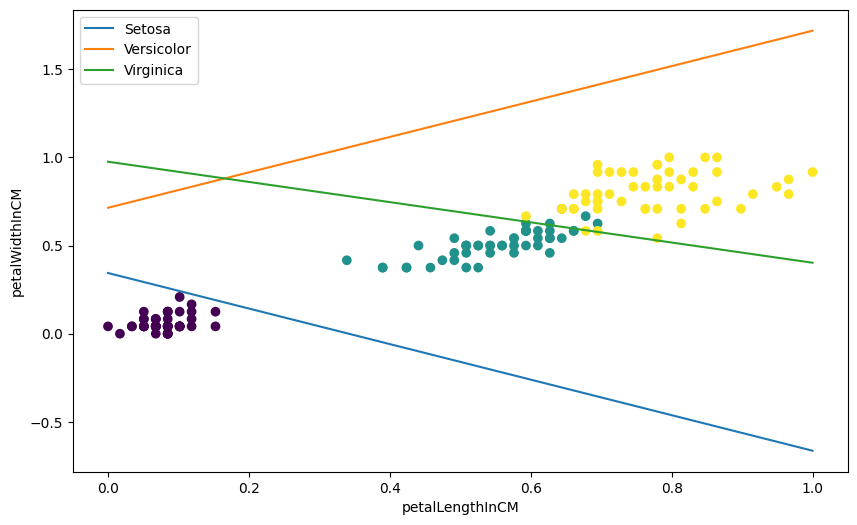

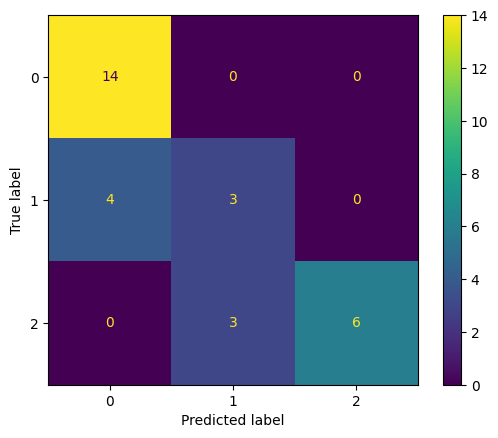

In [167]:
kf = KFold(n_splits= 5, shuffle=True, random_state=17) # Tem que embaralhar para não pegar amostras de uma mesma classe

for train_index, test_index in kf.split(iris_normalized[['sepalLengthInCM' , 'sepalWidthInCM' , 'petalLengthInCM' , 'petalWidthInCM']]):
  
    # One vs Rest - Iris Setosa
    iris_setosa = iris_normalized.copy()
    iris_setosa['target'] = iris_setosa['target'].apply(lambda x: 1 if x == 0 else 0)

    X_train = iris_setosa.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_setosa.iloc[train_index]['target']

    theta_setosa = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)

    # One vs Rest - Iris Versicolor
    iris_versicolor = iris_normalized.copy()
    iris_versicolor['target'] = iris_versicolor['target'].apply(lambda x: 1 if x == 1 else 0)

    X_train = iris_versicolor.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_versicolor.iloc[train_index]['target']

    theta_versicolor = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)

    # One vs Rest - Iris Virginica
    iris_virginica = iris_normalized.copy()
    iris_virginica['target'] = iris_virginica['target'].apply(lambda x: 1 if x == 2 else 0)

    X_train = iris_virginica.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_virginica.iloc[train_index]['target']

    theta_virginica = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)



    # Testando o modelo
    X_test = iris_normalized.iloc[test_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_test = iris_normalized.iloc[test_index]['target']

    y_pred_setosa = predict_class(X_test.values, theta_setosa)
    y_pred_versicolor = predict_class(X_test.values, theta_versicolor)
    y_pred_virginica = predict_class(X_test.values, theta_virginica)

    y_pred = np.vstack((y_pred_setosa, y_pred_versicolor, y_pred_virginica)).argmax(axis=0)

    print('==========')
    accuracy = (y_pred == y_test).mean()
    print('Accuracy:', accuracy)

    # Plotando a fronteira de decisão em relação às features petalLengthInCM e petalWidthInCM
    plt.figure(figsize=(10, 6))
    plt.scatter(iris_normalized['petalLengthInCM'], iris_normalized['petalWidthInCM'], c=iris_normalized['target'])
    plt.xlabel('petalLengthInCM')
    plt.ylabel('petalWidthInCM')

    x_values = np.array([iris_normalized['petalLengthInCM'].min(), iris_normalized['petalLengthInCM'].max()])
    y_values = -(theta_setosa[0] + theta_setosa[1] * x_values) / theta_setosa[2]
    plt.plot(x_values, y_values, label='Setosa')

    y_values = -(theta_versicolor[0] + theta_versicolor[1] * x_values) / theta_versicolor[2]
    plt.plot(x_values, y_values, label='Versicolor')

    y_values = -(theta_virginica[0] + theta_virginica[1] * x_values) / theta_virginica[2]
    plt.plot(x_values, y_values, label='Virginica')

    plt.legend()
    plt.show()

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    

### Database Standardizado

Accuracy: 0.7666666666666667


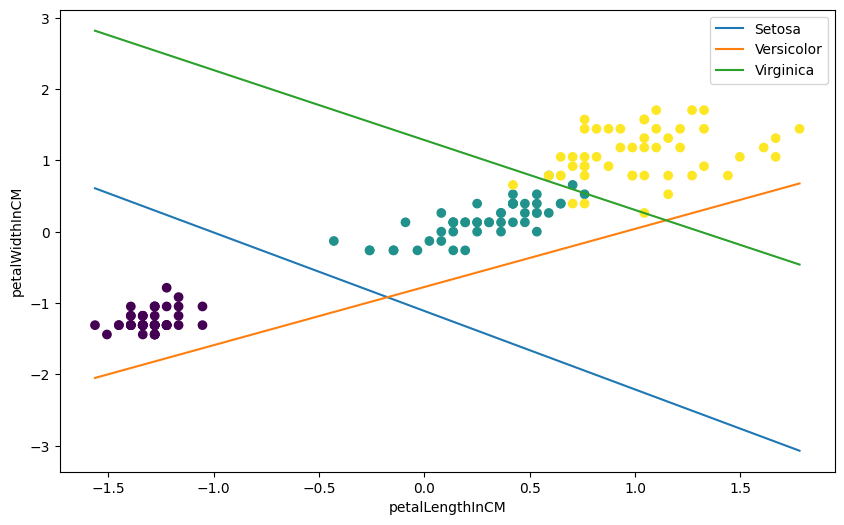

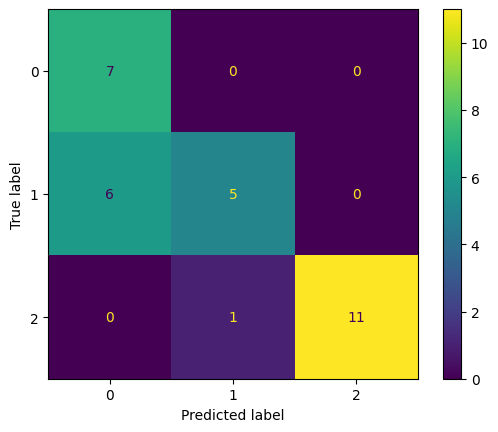

Accuracy: 0.6


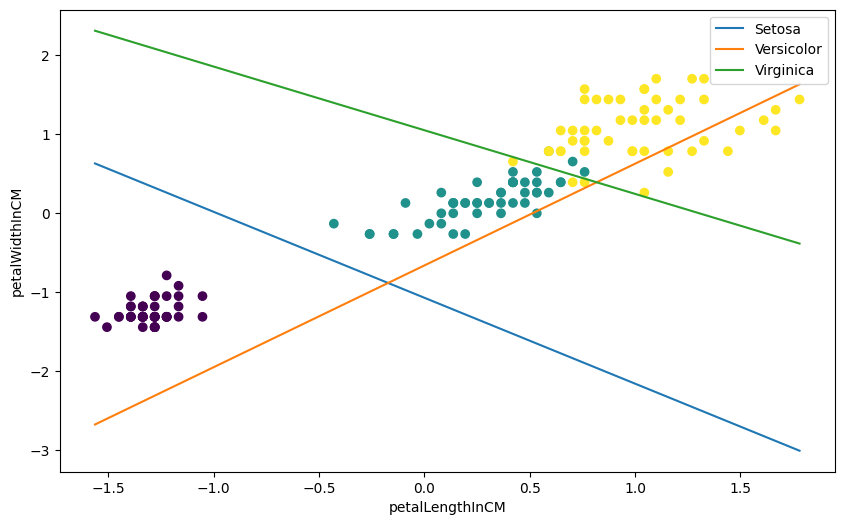

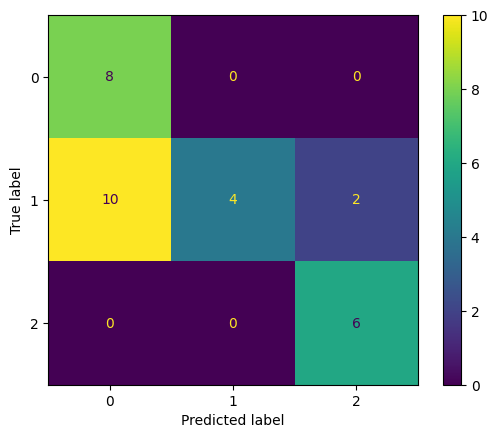

Accuracy: 0.8


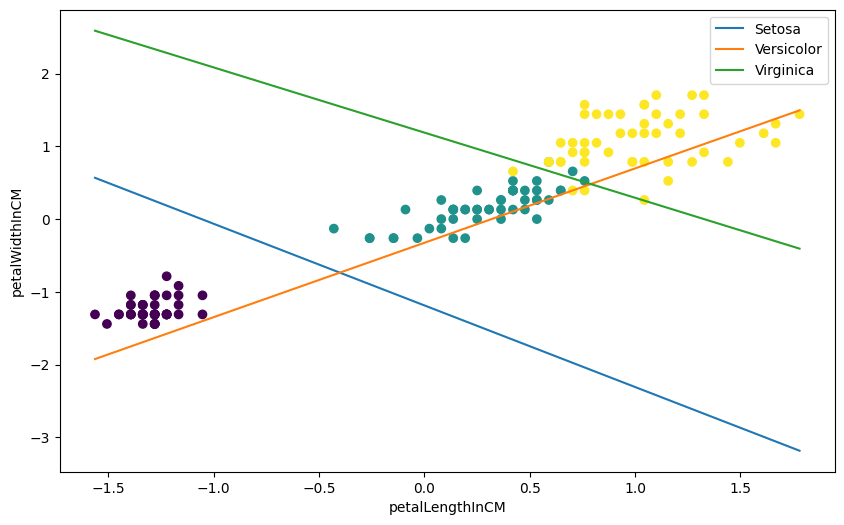

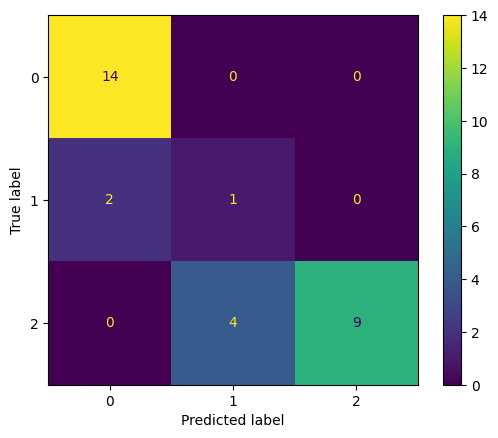

Accuracy: 0.6333333333333333


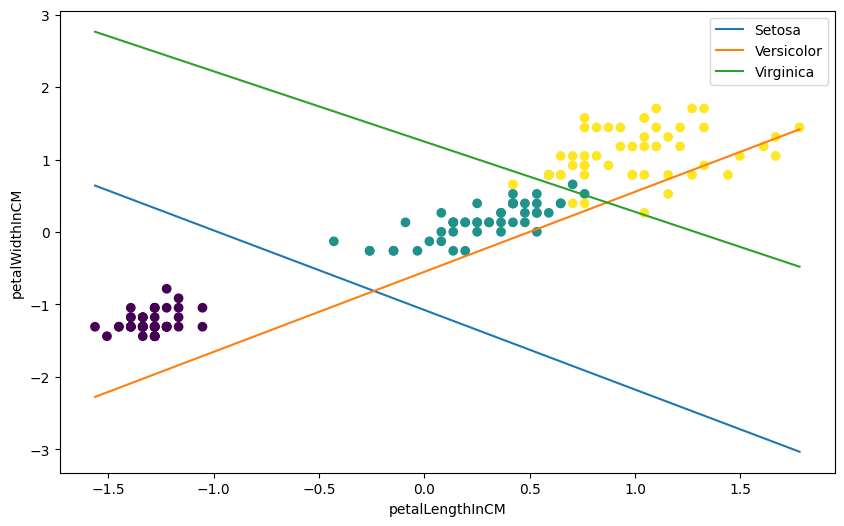

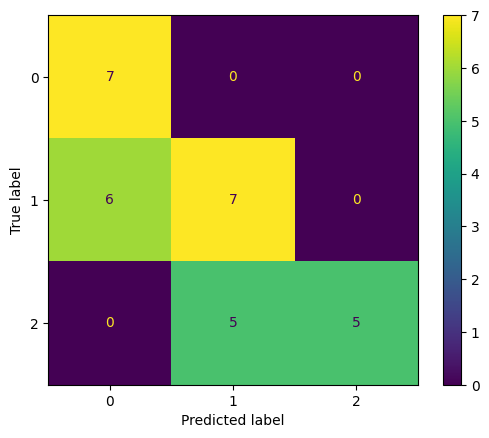

Accuracy: 0.8


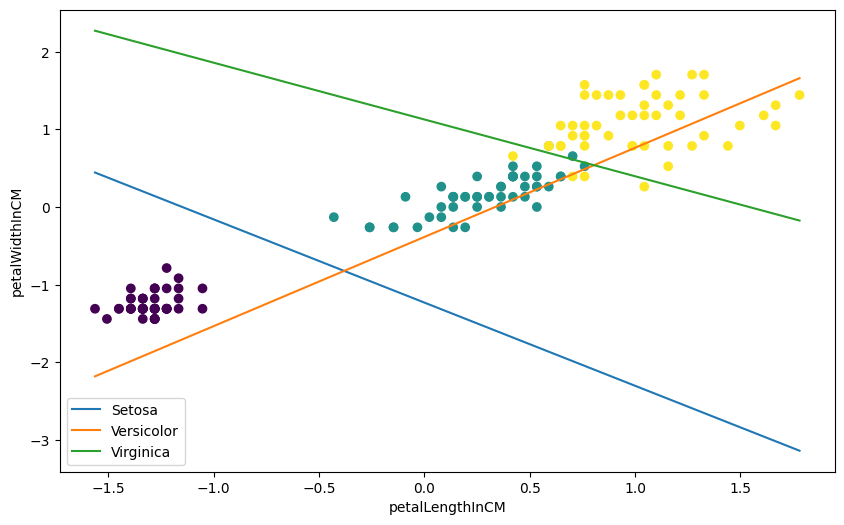

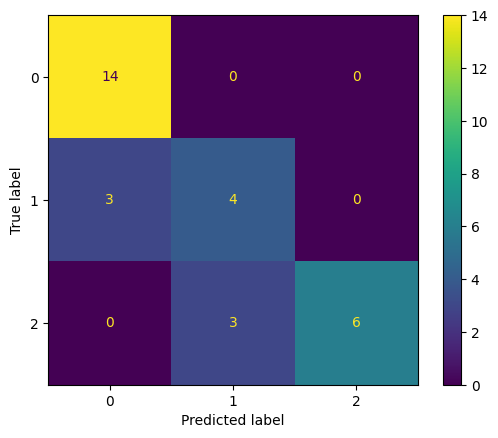

In [168]:
kf = KFold(n_splits=5, shuffle=True, random_state=17) # Tem que embaralhar para não pegar amostras de uma mesma classe

for train_index, test_index in kf.split(iris_standardized[['sepalLengthInCM' , 'sepalWidthInCM' , 'petalLengthInCM' , 'petalWidthInCM']]):

    
    # One vs Rest - Iris Setosa
    iris_setosa = iris_standardized.copy()
    iris_setosa['target'] = iris_setosa['target'].apply(lambda x: 1 if x == 0 else 0)

    X_train = iris_setosa.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_setosa.iloc[train_index]['target']

    theta_setosa = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)

    # One vs Rest - Iris Versicolor
    iris_versicolor = iris_standardized.copy()
    iris_versicolor['target'] = iris_versicolor['target'].apply(lambda x: 1 if x == 1 else 0)

    X_train = iris_versicolor.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_versicolor.iloc[train_index]['target']

    theta_versicolor = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)

    # One vs Rest - Iris Virginica
    iris_virginica = iris_standardized.copy()
    iris_virginica['target'] = iris_virginica['target'].apply(lambda x: 1 if x == 2 else 0)

    X_train = iris_virginica.iloc[train_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_train = iris_virginica.iloc[train_index]['target']

    theta_virginica = LogisticRegression(X_train.values, y_train.values, 0.01, 100000)



    # Testando o modelo
    X_test = iris_standardized.iloc[test_index][['petalLengthInCM' , 'petalWidthInCM', 'sepalLengthInCM' , 'sepalWidthInCM']]
    y_test = iris_standardized.iloc[test_index]['target']

    y_pred_setosa = predict_class(X_test.values, theta_setosa)
    y_pred_versicolor = predict_class(X_test.values, theta_versicolor)
    y_pred_virginica = predict_class(X_test.values, theta_virginica)
    y_pred = np.vstack((y_pred_setosa, y_pred_versicolor, y_pred_virginica)).argmax(axis=0)

    print('==========')
    accuracy = (y_pred == y_test).mean()
    print('Accuracy:', accuracy)

    # Plotando a fronteira de decisão em relação às features petalLengthInCM e petalWidthInCM
    plt.figure(figsize=(10, 6))
    plt.scatter(iris_standardized['petalLengthInCM'], iris_standardized['petalWidthInCM'], c=iris_standardized['target'])
    plt.xlabel('petalLengthInCM')
    plt.ylabel('petalWidthInCM')

    x_values = np.array([iris_standardized['petalLengthInCM'].min(), iris_standardized['petalLengthInCM'].max()])
    y_values = -(theta_setosa[0] + theta_setosa[1] * x_values) / theta_setosa[2]
    plt.plot(x_values, y_values, label='Setosa')

    y_values = -(theta_versicolor[0] + theta_versicolor[1] * x_values) / theta_versicolor[2]
    plt.plot(x_values, y_values, label='Versicolor')

    y_values = -(theta_virginica[0] + theta_virginica[1] * x_values) / theta_virginica[2]
    plt.plot(x_values, y_values, label='Virginica')

    plt.legend()
    plt.show()

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    